# Micro Credit Defaulter Project

In [1]:
# Importing some required libraries to load the dataset in the jupyter notebook and perform initial analysis on the dataset.

import numpy as np
import pandas as pd

# to set the output display width of the printed data.(for example: We have 37 columns in this dataset, pandas does not
# display all the columns at once.)
pd.set_option('display.max_columns', 50)

from matplotlib import pyplot as plt
import seaborn as sns

# ignore warnings returned by the jupyter notebbok using the warning library

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset using readcsv method in the pandas library

df = pd.read_csv('Data file.csv')
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0    220.13    260.13                2.0                0.0              1539   
1   3691.26   3691.26               20.0                0.0              5787   
2    900.13    900.13                3.0                0.0              1539   
3    159.42    159.42               41.0                0.0               947   
4   1098.90   1098.90                4.0                0.0              2309   

   cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0              2          21.0             3078.0                1539.0   
1              1           0.0             5787.0                5787.0   
2              1           0.0             1539.0                1539.0   
3              0           0.0                0.0                   0.0   
4              7           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
0                 0.0  29.000000  29.000000     UPW  2016-07-20  
1                 0.0   0.000000   0.000000     UPW  2016-08-10  
2                 0.0   0.000000   0.000000     UPW  2016-08-19  
3                 0.0   0.000000   0.000000     UPW  2016-06-06  
4                 0.0   2.333333   2.333333     UPW  2016-06-22

We can drop the unnamed column since it is also an index column and we do not need 2 index columns.

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
0                 0.0  29.000000  29.000000     UPW  2016-07-20  
1                 0.0   0.000000   0.000000     UPW  2016-08-10  
2                 0.0   0.000000   0.000000     UPW  2016-08-19  
3                 0.0   0.000000   0.000000     UPW  2016-06-06  
4                 0.0   2.333333   2.333333     UPW  2016-06-22

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [6]:
# lets check the unique values in the pcircle column
df['pcircle'].unique()

array(['UPW'], dtype=object)

This column has only one value in all the column hence it will not contribute anything for the model building and prediction. hecne we can drop this column.

In [7]:
df.drop(['pcircle'], axis=1, inplace=True)
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pdate'],
      dtype='object')

In [8]:
df['pdate'].unique()

array(['2016-07-20', '2016-08-10', '2016-08-19', '2016-06-06',
       '2016-06-22', '2016-07-02', '2016-07-05', '2016-08-05',
       '2016-06-15', '2016-06-08', '2016-06-12', '2016-06-20',
       '2016-06-29', '2016-06-16', '2016-08-03', '2016-06-24',
       '2016-07-04', '2016-07-03', '2016-07-01', '2016-08-08',
       '2016-06-26', '2016-06-23', '2016-07-06', '2016-07-09',
       '2016-06-10', '2016-06-07', '2016-06-27', '2016-08-11',
       '2016-06-30', '2016-06-19', '2016-07-26', '2016-08-14',
       '2016-06-14', '2016-06-21', '2016-06-25', '2016-06-28',
       '2016-06-11', '2016-07-27', '2016-07-23', '2016-08-16',
       '2016-08-15', '2016-06-02', '2016-06-05', '2016-08-02',
       '2016-07-28', '2016-07-18', '2016-08-18', '2016-07-16',
       '2016-07-29', '2016-07-21', '2016-06-03', '2016-06-13',
       '2016-08-01', '2016-07-13', '2016-07-10', '2016-06-09',
       '2016-07-15', '2016-07-11', '2016-08-09', '2016-08-12',
       '2016-07-22', '2016-06-04', '2016-07-24', '2016-

In [9]:
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     209593.000000  209593.000000  209593.000000      209593.000000   
mean        2064.452797       3.978057    3737.355121        7704.501157   
std         2370.786034       4.256090   53643.625172       10139.621714   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1540.000000   
50%         1539.000000       3.000000       2.000000        4628.000000   
75%         2309.000000       5.000000       6.000000       10010.000000   
max        55000.000000     203.000000  999606.368132      810096.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count         209593.000000         209593.000000   209593.00000   
mean            1812.817952           3851.927942        6.31543   
std             2070.864620          54006.374433        7.19347   
min                0.000000           -200.000000        0.00000   
25%              770.000000             11.000000        2.00000   
50%             1539.000000             33.900000        4.00000   
75%             1924.000000             83.000000        8.00000   
max            55000.000000         999479.419319      336.00000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  209593.000000      209593.000000         209593.000000   
mean        7.716780       12396.218352           1864.595821   
std        12.590251       16857.793882           2081.680664   
min         0.000000           0.000000              0.000000   
25%         0.000000        2317.000000            773.000000   
50%         2.000000        7226.000000           1539.000000   
75%         8.000000       16000.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.000000   

        fr_da_rech90    cnt_loans30   amnt_loans30  maxamnt_loans30  \
count  209593.000000  209593.000000  209593.000000    20959

In [10]:
# lets check for the null values

df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

As seen above this dataset does not have null values in any of the columns

Some Details for the columns given in the dataset

In [11]:
# 1.aon : age on cellular network in days
# Some of the values are in negative, which mean the customer has not been on the cellular network for that many days.
# Also we can see that that there is a huge gap between the maximum and 75% for the aon field/column. Hence there are outliers.
# It can be seen in almost all the columns that outliers are present. Lets treat the outliers first of all.

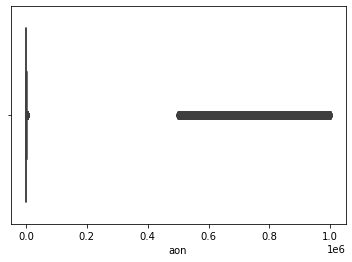

In [12]:
sns.boxplot(x=df["aon"],orient='vertical')
plt.show()

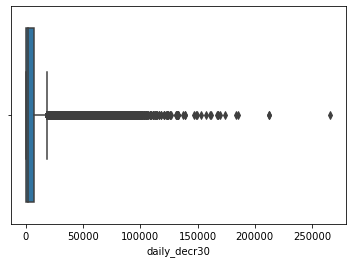

In [13]:
sns.boxplot(x=df["daily_decr30"],orient='vertical')
plt.show()

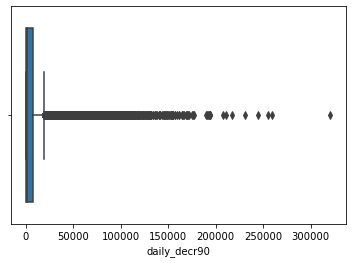

In [14]:
sns.boxplot(x=df["daily_decr90"],orient='vertical')
plt.show()

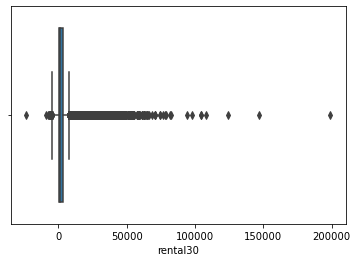

In [15]:
sns.boxplot(x=df["rental30"],orient='vertical')
plt.show()

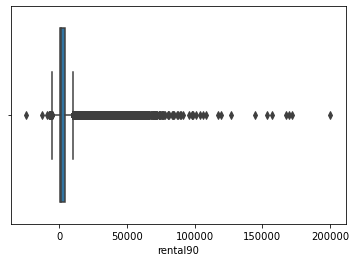

In [16]:
sns.boxplot(x=df["rental90"],orient='vertical')
plt.show()

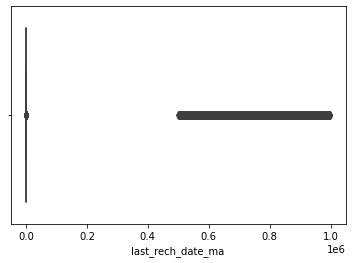

In [17]:
sns.boxplot(x=df["last_rech_date_ma"],orient='vertical')
plt.show()

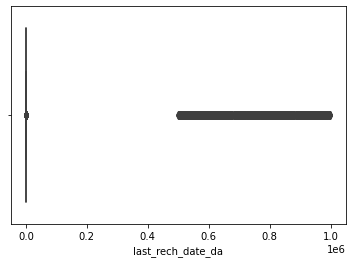

In [18]:
sns.boxplot(x=df["last_rech_date_da"],orient='vertical')
plt.show()

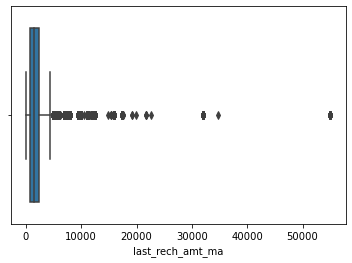

In [19]:
sns.boxplot(x=df["last_rech_amt_ma"],orient='vertical')
plt.show()

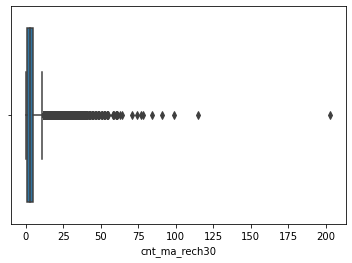

In [20]:
sns.boxplot(x=df["cnt_ma_rech30"],orient='vertical')
plt.show()

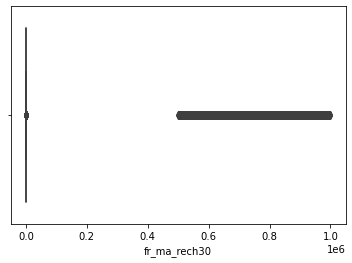

In [21]:
sns.boxplot(x=df["fr_ma_rech30"],orient='vertical')
plt.show()

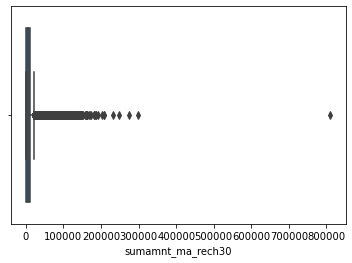

In [22]:
sns.boxplot(x=df["sumamnt_ma_rech30"],orient='vertical')
plt.show()

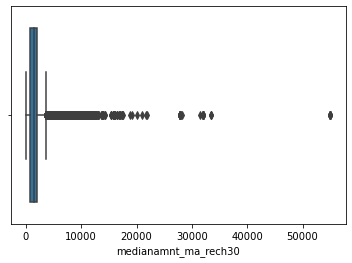

In [23]:
sns.boxplot(x=df["medianamnt_ma_rech30"],orient='vertical')
plt.show()

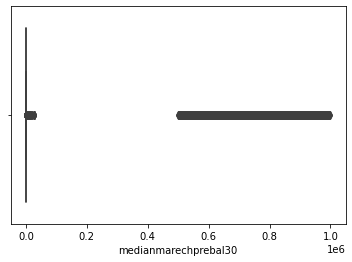

In [24]:
sns.boxplot(x=df["medianmarechprebal30"],orient='vertical')
plt.show()

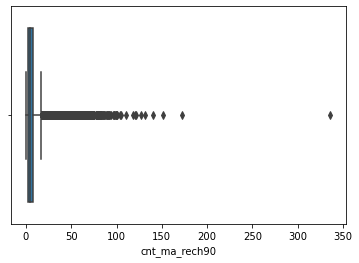

In [25]:
sns.boxplot(x=df["cnt_ma_rech90"],orient='vertical')
plt.show()

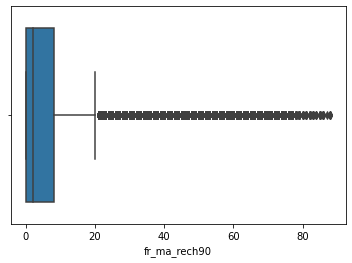

In [26]:
sns.boxplot(x=df["fr_ma_rech90"],orient='vertical')
plt.show()

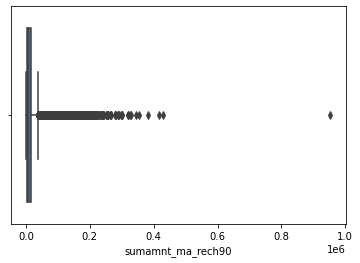

In [27]:
sns.boxplot(x=df["sumamnt_ma_rech90"],orient='vertical')
plt.show()

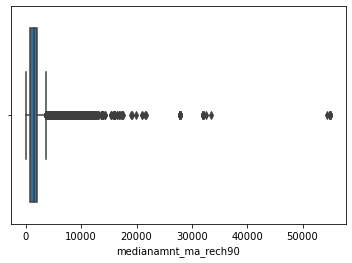

In [28]:
sns.boxplot(x=df["medianamnt_ma_rech90"],orient='vertical')
plt.show()

In [29]:
#lets check the skewness
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

In [30]:
df1 = df.copy()
df1.drop(['pdate','msisdn'], axis=1, inplace=True)

In [31]:
columns = df1.columns
columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [32]:
corr = df1.corr()

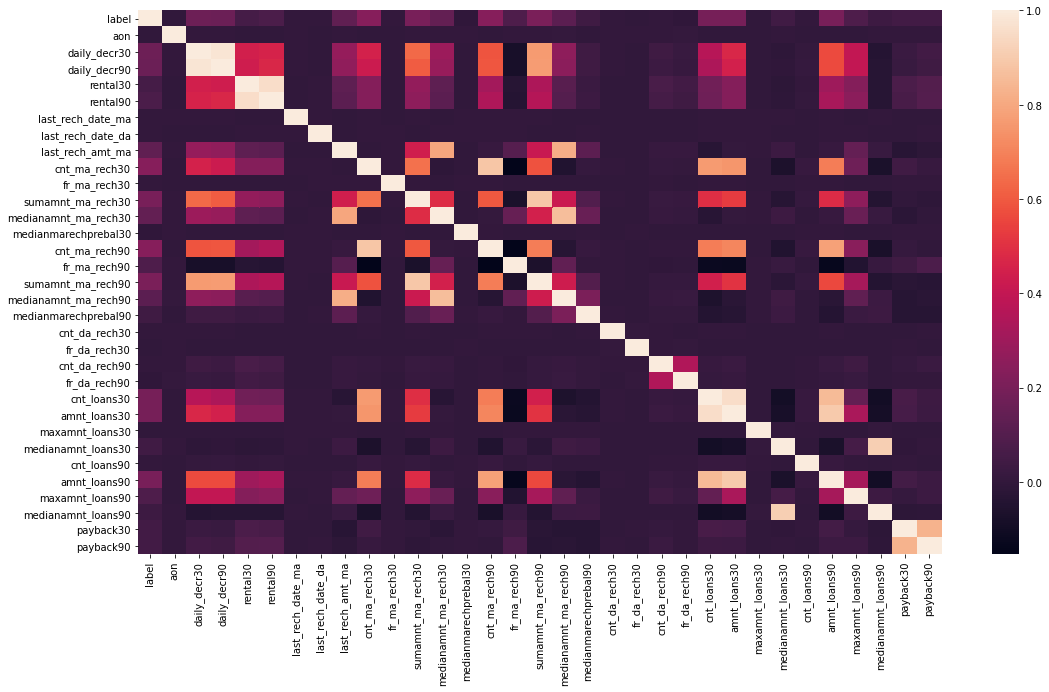

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(18, 10))
sns.heatmap(corr, annot=False)
plt.show()

label is out target variable. From the above heatmap we can see that below columns are having very leass correlation to the target variable label, hence we shall drop these columns:

1. aon
2. last_rech_date_ma
3. last_rech_date_da
4. cnt_da_rech30
5. fr_da_rech30
6. cnt_da_rech90
7. fr_da_rech90

In [34]:
df1.drop(['aon','last_rech_date_ma','last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90'
        ,'fr_da_rech90'], axis=1, inplace=True)

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   daily_decr30          209593 non-null  float64
 2   daily_decr90          209593 non-null  float64
 3   rental30              209593 non-null  float64
 4   rental90              209593 non-null  float64
 5   last_rech_amt_ma      209593 non-null  int64  
 6   cnt_ma_rech30         209593 non-null  int64  
 7   fr_ma_rech30          209593 non-null  float64
 8   sumamnt_ma_rech30     209593 non-null  float64
 9   medianamnt_ma_rech30  209593 non-null  float64
 10  medianmarechprebal30  209593 non-null  float64
 11  cnt_ma_rech90         209593 non-null  int64  
 12  fr_ma_rech90          209593 non-null  int64  
 13  sumamnt_ma_rech90     209593 non-null  int64  
 14  medianamnt_ma_rech90  209593 non-null  float64
 15  

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
for each in df1:
    scaler.partial_fit(df1)

In [38]:
print(scaler.mean_)
print(scaler.var_)

[8.75177129e-01 5.38140229e+03 6.08251507e+03 2.69258191e+03
 3.48340653e+03 2.06445280e+03 3.97805747e+00 3.73735512e+03
 7.70450116e+03 1.81281795e+03 3.85192794e+03 6.31543038e+00
 7.71677966e+00 1.23962184e+04 1.86459582e+03 9.20255415e+01
 2.75898050e+00 1.79520213e+01 2.74658747e+02 5.40285219e-02
 1.85209191e+01 2.36453985e+01 6.70313417e+00 4.60773976e-02
 3.39882644e+00 4.32148523e+00]
[1.09242122e-01 8.50194902e+07 1.19219903e+08 1.85638315e+07
 3.32980645e+07 5.62059960e+06 1.81142122e+01 2.87762479e+09
 1.02811438e+08 4.28845981e+06 2.91667456e+09 5.17457657e+01
 1.58513675e+02 2.84183859e+08 4.33337371e+06 1.36319552e+05
 6.52545008e+00 3.02053969e+02 1.80221859e+07 4.75406193e-02
 5.05336402e+04 7.00650200e+02 4.42622469e+00 4.02769059e-02
 7.76814400e+01 1.06256581e+02]


In [39]:
for each in df1:
    scaled_data = scaler.transform(df1)

# Spliting the Dataset into x and y

In [43]:
x = df1.drop(['label'],axis=1)
y = pd.DataFrame(df1['label'])

In [44]:
x.head()

daily_decr30  daily_decr90  rental30  rental90  last_rech_amt_ma  \
0   3055.050000   3065.150000    220.13    260.13              1539   
1  12122.000000  12124.750000   3691.26   3691.26              5787   
2   1398.000000   1398.000000    900.13    900.13              1539   
3     21.228000     21.228000    159.42    159.42               947   
4    150.619333    150.619333   1098.90   1098.90              2309   

   cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0              2          21.0             3078.0                1539.0   
1              1           0.0             5787.0                5787.0   
2              1           0.0             1539.0                1539.0   
3              0           0.0                0.0                   0.0   
4              7           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_loans30  amnt_loans30  \
0                1539.0                  7.50            2            12   
1                5787.0                 61.04            1            12   
2                1539.0                 66.32            1             6   
3                 947.0                  2.50            2            12   
4                2888.0                 35.00            7            42   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  
0                6                 0.0  29.000000  29.000000  
1               12                 0.0   0.000000   0.000000  
2                6                 0.0   0.000000   0.000000  
3                6                 0.0   0.000000   0.000000  
4                6                 0.0   2.333333   2.333333

In [45]:
y.head()

label
0      0
1      1
2      1
3      1
4      1

# Finding Best random state

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lg=LogisticRegression()
rand_state = 0
accu = 0
for i in (30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    y_pred = lg.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
    if tempaccu > accu:
        accu = tempaccu
        rand_state = i
        
print(f"Best Accuracy {accu*100} found on Random state {rand_state}")

Best Accuracy 87.71440158400725 found on Random state 200


We found the best random state at 200 and will be using it in train_test_split in next step

In [50]:
# creating train test split using the best random state which we found above
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=200)

# Importing Classification libraries for model building

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [52]:
algo = [LogisticRegression,RandomForestClassifier,SGDClassifier,DecisionTreeClassifier,
        KNeighborsClassifier,GaussianNB]

for each in algo:
    model = each()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f"{model}\n",classification_report(y_test, y_pred))
    print("\n")

LogisticRegression()
               precision    recall  f1-score   support

           0       0.51      0.16      0.24      5194
           1       0.89      0.98      0.93     36725

    accuracy                           0.88     41919
   macro avg       0.70      0.57      0.59     41919
weighted avg       0.84      0.88      0.85     41919



RandomForestClassifier()
               precision    recall  f1-score   support

           0       0.72      0.44      0.55      5194
           1       0.93      0.98      0.95     36725

    accuracy                           0.91     41919
   macro avg       0.82      0.71      0.75     41919
weighted avg       0.90      0.91      0.90     41919



SGDClassifier()
               precision    recall  f1-score   support

           0       0.12      0.01      0.02      5194
           1       0.88      0.99      0.93     36725

    accuracy                           0.87     41919
   macro avg       0.50      0.50      0.47     41919
weigh

RandomForestClassifier gave us the best accuract of 91%. Hence for this Micro credit Defaulter project we can consider RandomForestClassifier as the best classifier which can correctly predict 91% of times if the customer will default or not